<a href="https://colab.research.google.com/github/vinkharisma/PCVK_Genap_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Matching, Face Detection, Face Tracking**


1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama "Week12.ipynb". Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.


In [17]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

<Figure size 1000x1000 with 0 Axes>

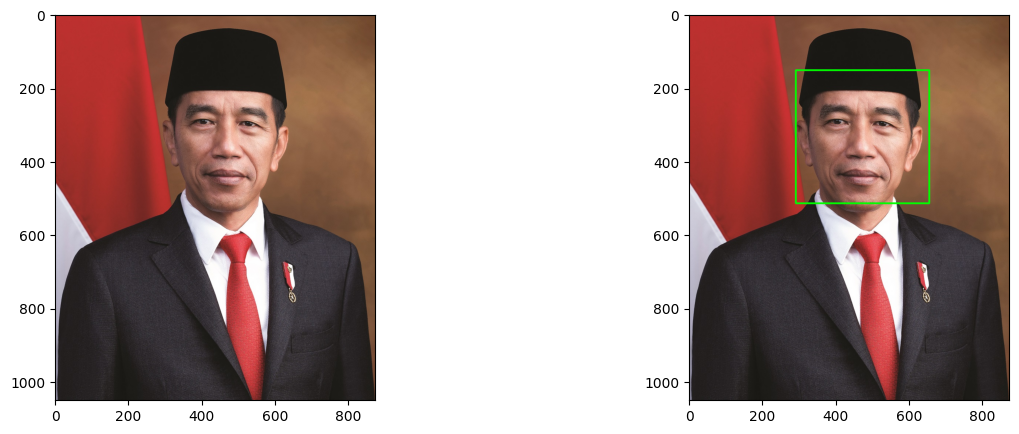

<Figure size 1000x1000 with 0 Axes>

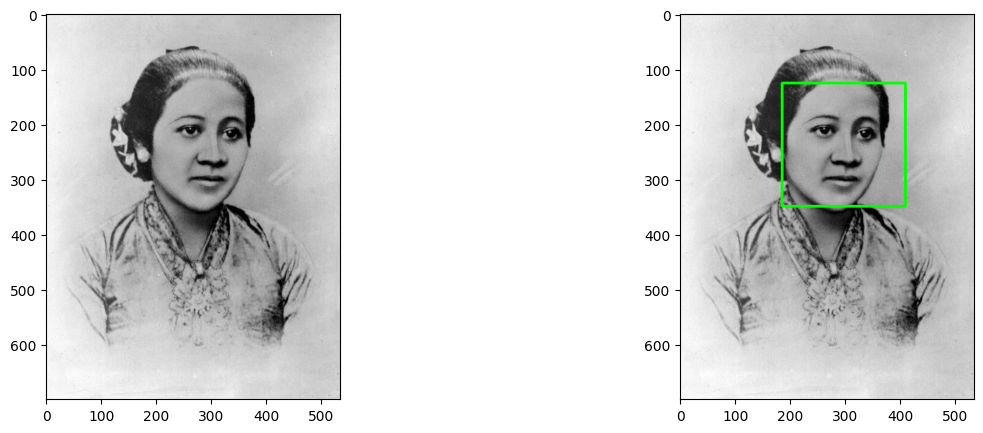

<Figure size 1000x1000 with 0 Axes>

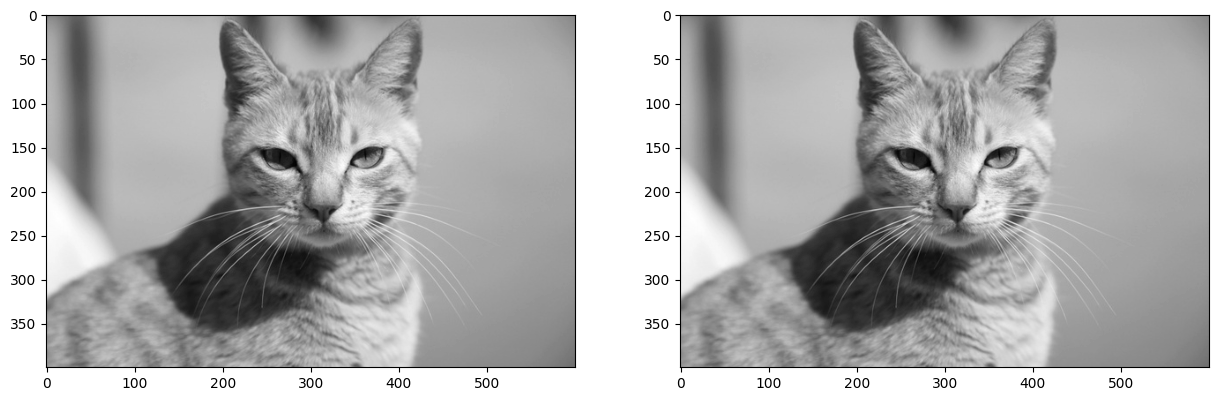

<Figure size 1000x1000 with 0 Axes>

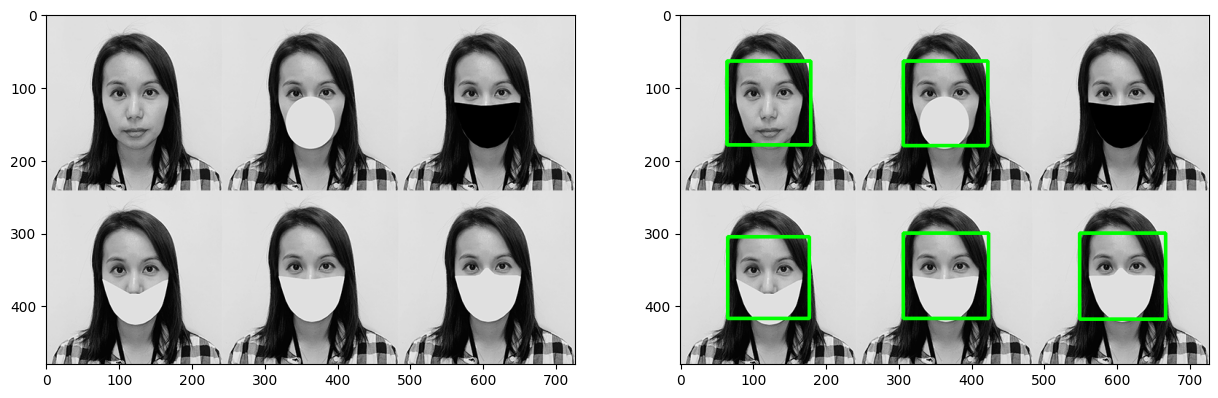

<Figure size 1000x1000 with 0 Axes>

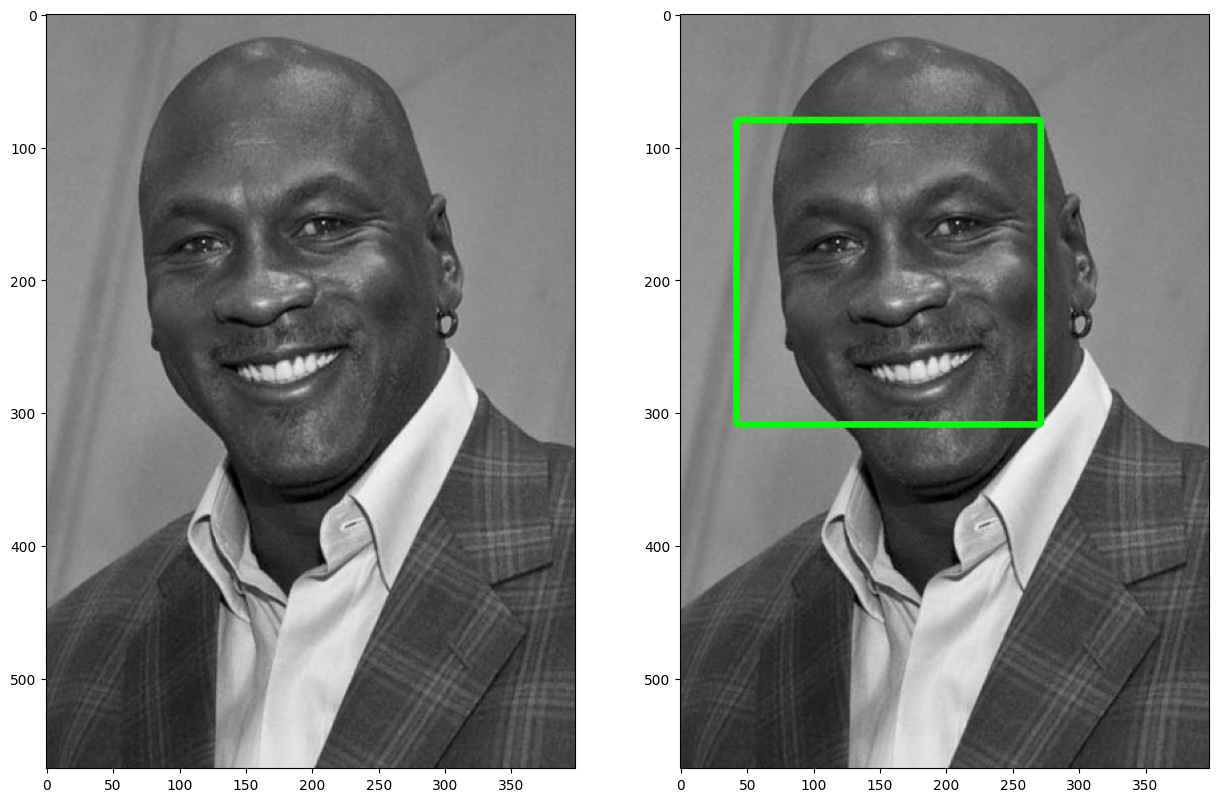

<Figure size 1000x1000 with 0 Axes>

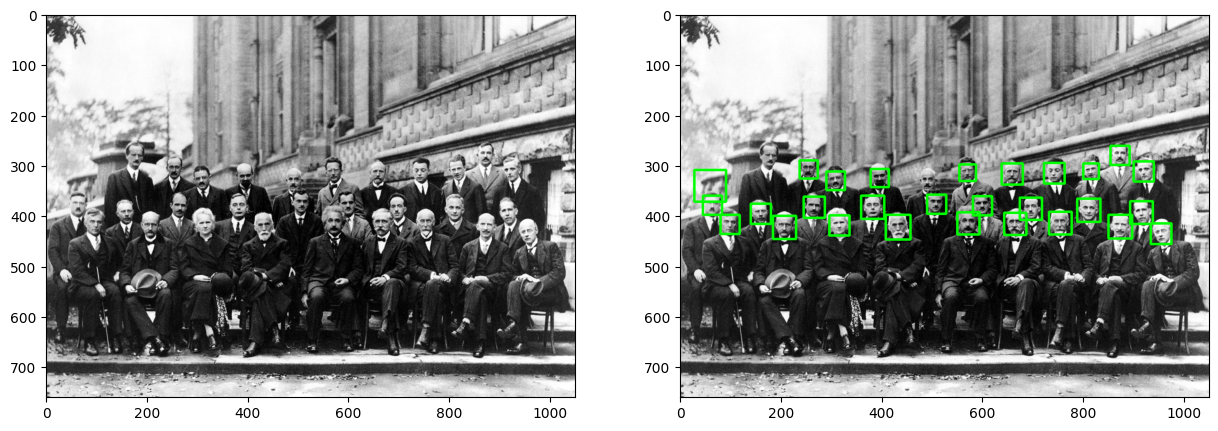

In [39]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

# Image Jokowi
jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')
jokowi1 = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')

roi_wajah1 = cascade_wajah.detectMultiScale(jokowi1) 

roi_wajah = cascade_wajah.detectMultiScale(jokowi) 
for(x,y,w,h) in roi_wajah: 
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(jokowi1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.show()

# Image RA.Kartini
kartini = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg')
kartini1 = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg')
roi_wajah1 = cascade_wajah.detectMultiScale(kartini1) 

roi_wajah = cascade_wajah.detectMultiScale(kartini) 
for(x,y,w,h) in roi_wajah: 
 cv.rectangle(kartini,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10)) 

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(kartini1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(kartini, cv.COLOR_BGR2RGB))
plt.show()

# Image Kucing
mycat = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg')
mycat1 = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg')

mycat_ori = cv.cvtColor(mycat, cv.COLOR_BGR2GRAY)
mycat_ori1 = cv.cvtColor(mycat1, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(mycat1)
for (x,y,w,h) in roi_wajah: 
  cv.rectangle(mycat1,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(mycat_ori, cmap='gray')
plt.subplot(122),plt.imshow(mycat_ori1, cmap='gray')
plt.show()

# Image Perempuan Menggunakan Masker
mask = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mask.png',0)
mask_rgb = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
mask_fc = mask_rgb.copy()

cc_mask = cascade_wajah.detectMultiScale(mask_fc)
for(x,y,w,h) in cc_mask:
  cv.rectangle(mask_fc, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,10))
plt.subplot(121),plt.imshow(mask_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mask_fc,cmap='gray')
plt.show()

# Image M. Jordan
mjordan = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg',0)
mjordan_rgb = cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)
mjordan_fc = mjordan_rgb.copy()

cc_mjordan = cascade_wajah.detectMultiScale(mjordan_fc)
for(x,y,w,h) in cc_mjordan:
  cv.rectangle(mjordan_fc, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(15,10))
plt.subplot(121),plt.imshow(mjordan_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mjordan_fc,cmap='gray')
plt.show()

# Image Old Photo
solvayconf = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg',0)
solvayconf_rgb = cv.cvtColor(solvayconf, cv.COLOR_BGR2RGB)
solvayconf_fc = solvayconf_rgb.copy()

cc_solvayconf = cascade_wajah.detectMultiScale(solvayconf_fc)
for(x,y,w,h) in cc_solvayconf:
  cv.rectangle(solvayconf_fc, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(15,10))
plt.subplot(121),plt.imshow(solvayconf_rgb,cmap='gray')
plt.subplot(122),plt.imshow(solvayconf_fc,cmap='gray')
plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

<Figure size 1000x1000 with 0 Axes>

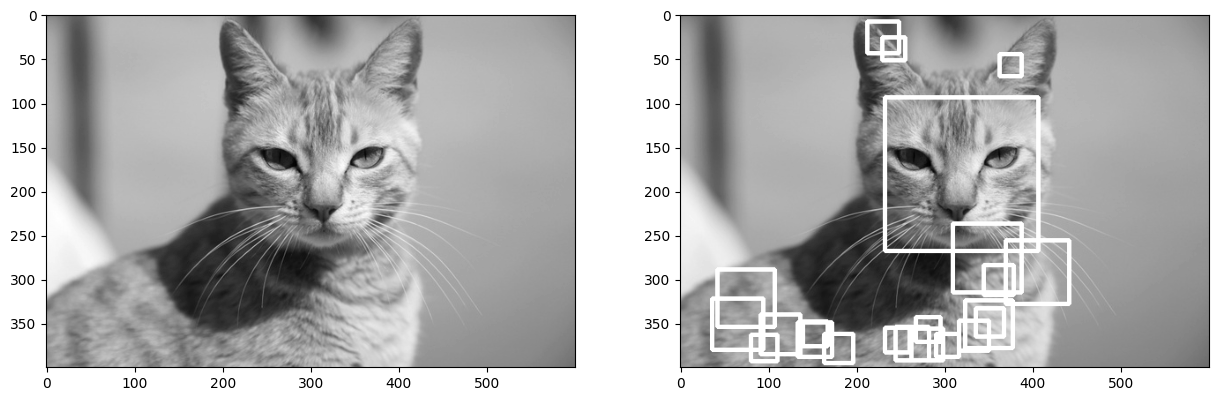

In [32]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml')

cat_ori = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg',0)
cat_detect = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg',0)

# Inisialisasi detektor wajah
fd_cat = cascade_wajah.detectMultiScale(cat_detect)

# Gambar persegi panjang di sekitar wajah
for (x,y,w,h) in fd_cat: 
  cv.rectangle(cat_detect,(x,y),(x+w,y+h),(255,255,255),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))

# Tampilkan hasil deteksi wajah
plt.subplot(121),plt.imshow(cat_ori, cmap='gray')
plt.subplot(122),plt.imshow(cat_detect, cmap='gray')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

4. Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”, sehingga menghasilkan gambar seperti berikut.

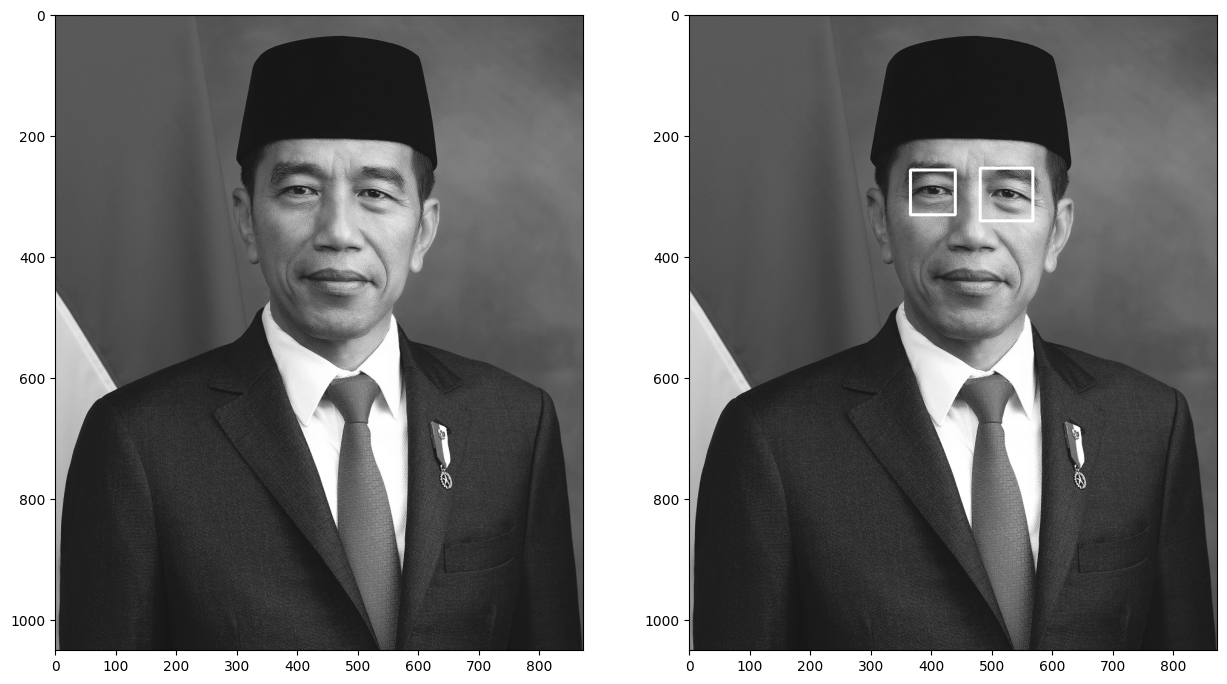

In [24]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml') 

jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')
jokowi_ori = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
jokowi_ori_gray = cv.cvtColor(jokowi_ori, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah: 
  cv.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,255,255),3)

f, axarr = plt. subplots(1,2,figsize=(15,10))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YiWh7QvVH60 

In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

## Helper Functions

Below are a few helper function to make converting between different image data types and formats

In [2]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## Haar Cascade Classfier
For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model. 

In [3]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

## Webcam Images
Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for **Camera Capture** to utilize your computer's webcam.

In [4]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


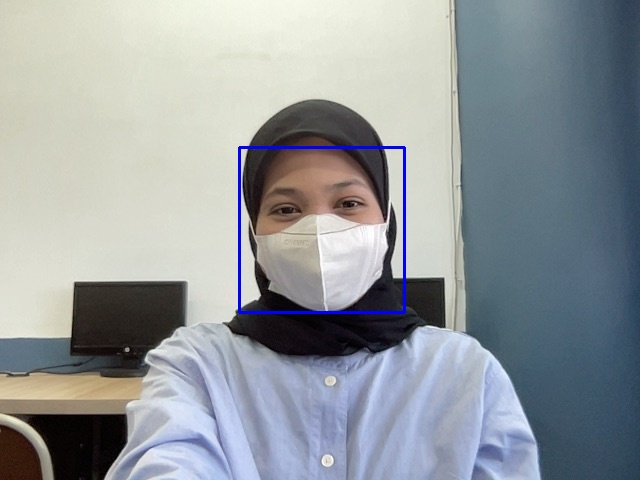

In [5]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Webcam Videos
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.

In [6]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [8]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan deteksi bagian wajah gambar “mjordan.jpg”, kemudian tindih bagian wajah tersebut dengan gambar “smile.png”. Berikut contoh keluarannya.

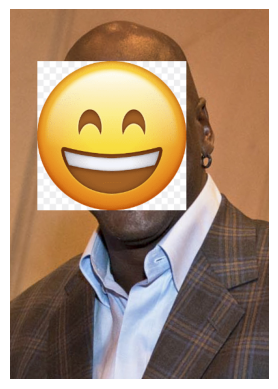

In [42]:
# Inisialisasi detektor wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

# Baca gambar
mjordan_ori = cv2.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg')
mjordan_grey = cv2.cvtColor(mjordan_ori, cv2.COLOR_BGR2GRAY)
mjordan_blur = mjordan_grey.copy()

# Deteksi wajah
fd_mjordan = cascade_wajah.detectMultiScale(mjordan_blur)

# Mendapatkan gambar "smile.png"
smile_img = cv2.imread('/content/drive/MyDrive/PCVK/Images/facedet/smile.png', cv2.IMREAD_UNCHANGED)

# Menindih bagian wajah dengan gambar "smile.png"
for (x, y, w, h) in fd_mjordan:
    # Mengubah ukuran gambar "smile.png" sesuai dengan ukuran wajah
    resized_smile = cv2.resize(smile_img, (w, h))
    # Menindih gambar "smile.png" ke dalam gambar "mjordan_ori"
    mjordan_ori[y:y+h, x:x+w] = resized_smile

# Tampilkan gambar asli dengan bagian wajah ditindih smile
plt.imshow(cv2.cvtColor(mjordan_ori, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

7. Lakukan deteksi wajah dengan menggunakan bounding box berwarna hitam, deteksi mata menggunakan bounding box berwarna putih, dan deteksi mata kanan menggunakan bounding box berwarna merah. Gunakan gambar “people.jpg” untuk mengerjakan soal pada nomor ini. Berikut contoh keluarannya.

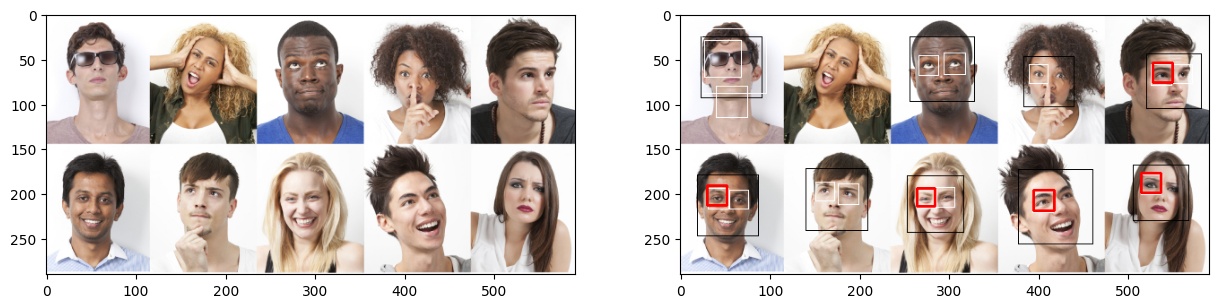

In [82]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml')
cascade_mata_kanan = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_righteye_2splits.xml')

people = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/people.jpg')
people1 = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/people.jpg')

gray = cv.cvtColor(people, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(gray)
for (x, y, w, h) in roi_wajah:
    cv.rectangle(people, (x, y), (x+w, y+h), (0, 0, 0), 1)

roi_mata = cascade_mata.detectMultiScale(gray)
for (x, y, w, h) in roi_mata:
    cv.rectangle(people, (x, y), (x+w, y+h), (255, 255, 255), 1)

roi_mata_kanan = cascade_mata_kanan.detectMultiScale(gray)
for (x, y, w, h) in roi_mata_kanan:
    cv.rectangle(people, (x, y), (x+w, y+h), (0, 0, 255), 2)

f, axarr = plt. subplots(1,2,figsize=(15,10))

plt.subplot(121),plt.imshow(cv.cvtColor(people1, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(people1, cv.COLOR_BGR2RGB))

plt.subplot(122),plt.imshow(cv.cvtColor(people, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(people, cv.COLOR_BGR2RGB))

plt.show()
